### Diabetic Data Analysis
<br> The following report assesses readmission risks within 30 days of discharge by age and race. Findings are presented using summaries and graphs.

1. Import Libraries & Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

We can run a head() function to get a quick view of the data:

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Since this analysis will only be focusing on the readmission risks by race and age, we can take a subset of the original dataset below: 

In [4]:
df0 = df.loc[:,['race','age','readmitted']]
df0

,race,age,readmitted
0,Caucasian,[0-10),NO
1,Caucasian,[10-20),>30
2,AfricanAmerican,[20-30),NO
3,Caucasian,[30-40),NO
4,Caucasian,[40-50),NO
...,...,...,...
101761,AfricanAmerican,[70-80),>30
101762,AfricanAmerican,[80-90),NO
101763,Caucasian,[70-80),NO
101764,Caucasian,[80-90),NO


We are interested in the race and age distribution of patients who are readmitted within 30 days after discharge, thus we can filter on "readmitted" < 30

In [5]:
df1 = df0.loc[(df0['readmitted'] == '<30')]
df1

,race,age,readmitted
11,AfricanAmerican,[60-70),<30
12,Caucasian,[40-50),<30
16,AfricanAmerican,[50-60),<30
46,Caucasian,[70-80),<30
50,AfricanAmerican,[50-60),<30
...,...,...,...
101699,Caucasian,[80-90),<30
101727,Caucasian,[70-80),<30
101732,?,[70-80),<30
101746,Caucasian,[70-80),<30


Before moving on to the analysis, note that the data conatians unknown 'race' identifiers. They appear in the data as '?'. 
<br>We can replace those fields with 'Unknown':

In [32]:
df2 = df1.replace('?','Unknown')
df2['race'].unique()

array(['AfricanAmerican', 'Caucasian', 'Other', 'Hispanic', 'Unknown',
       'Asian'], dtype=object)

2. Data Analysis

First, we can summarize the numbers of patients who are readmitted within 30 days of discharge by race:

In [33]:
df_race = df2.groupby(['race'])['readmitted'].count().reset_index(name='count')
df_race

,race,count
0,AfricanAmerican,2155
1,Asian,65
2,Caucasian,8592
3,Hispanic,212
4,Other,145
5,Unknown,188


The pie chart below shows the distribution of patients who are readmitted by their race:

Text(0.5, 1.0, 'Re-admission Within 30 Days (By Race)')

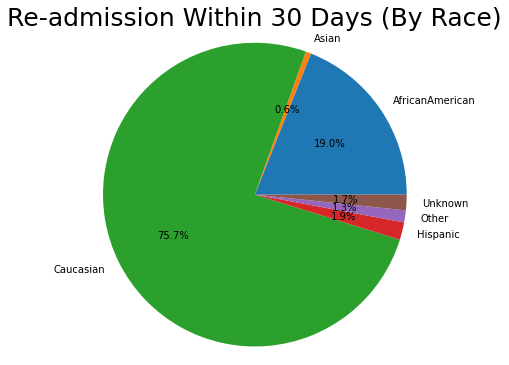

In [35]:
labels = df_race['race']
readmission = df_race['count']

plt.figure(figsize=(6,6))
plt.pie(readmission, labels = labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Re-admission Within 30 Days (By Race)',fontsize = 25)

We can see that 75.7% of all who are readmitted within 30 days are Caucasian, followed by African American who makes up 19% of the total.

Similarly, we can summarize the distribution of readmission by age:

In [8]:
df_age = df2.groupby(['age'])['readmitted'].count().reset_index(name='count')
df_age

,age,count
0,[0-10),3
1,[10-20),40
2,[20-30),236
3,[30-40),424
4,[40-50),1027
5,[50-60),1668
6,[60-70),2502
7,[70-80),3069
8,[80-90),2078
9,[90-100),310


Graphical representation below:

Text(0.5, 1.0, 'Re-admission Within 30 Days (By Age)')

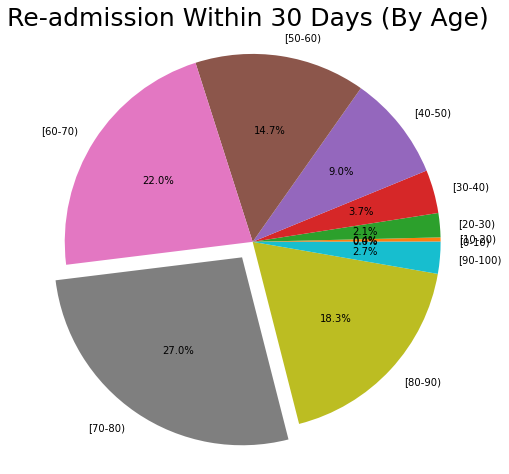

In [36]:
labels = df_age['age']
readmission = df_age['count']
explode = (0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0)

plt.figure(figsize=(8,8))
plt.pie(readmission, explode = explode, labels = labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Re-admission Within 30 Days (By Age)',fontsize = 25)

Patients who are in the 70-80 year-old age group make up 27% of the total number of patients who get readmitted after discharge, followed by 60-70 year-old age group representing 22% of the total.

3. Conclusion

The summaries and pie graphs above show that among all races, Caucasians make up the highest percentage to be readmitted in less than 30 days after discharge; patients who are 70-80 years old have the highest risk of being readmitted within 30 days of discharge. Further analysis could be conducted to determine whether the distributions of readmission by race and age is proportional to the distribution of patient intakes. 